In [1]:
!pip install keras

In [4]:
import numpy as np
import matplotlib.pyplot as plt

from __future__ import print_function
import keras
from keras.utils import np_utils
from keras.callbacks import EarlyStopping
from keras.preprocessing.image import ImageDataGenerator
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K


In [5]:
def plot_history(history):
    # print(history.history.keys())

    # 精度の履歴をプロット
    plt.plot(history.history['acc'], marker='.')
    plt.plot(history.history['val_acc'], marker='.')
    plt.title('model accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.grid()
    plt.legend(['acc', 'val_acc'], loc='lower right')
    plt.show()

    # 損失の履歴をプロット
    plt.plot(history.history['loss'], marker='.')
    plt.plot(history.history['val_loss'], marker='.')
    plt.title('model loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.grid()
    plt.legend(['loss', 'val_loss'], loc='lower right')
    plt.show()

In [ ]:
if __name__ == "__main__":
    batch_size = 32
    nb_classes = 10
    nb_epoch = 200
    # MNISTデータのロード
    (x_train, y_train), (x_test, y_test) = cifar10.load_data()
    input_shape=x_train.shape[1:]
    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
    x_train /= 255
    x_test /= 255
    print('x_train shape:', x_train.shape)
    print(x_train.shape[0], 'train samples')
    print(x_test.shape[0], 'test samples')

    # one-hot-encoding
    y_train = np_utils.to_categorical(y_train, nb_classes)
    y_test = np_utils.to_categorical(y_test, nb_classes)

    # 多層ニューラルネットワークモデルを構築
    model = Sequential()
    model.add(Conv2D(32, (3, 3),
                 activation='relu',
                 input_shape=input_shape))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    #    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))

    #    model.add(Dropout(0.5))
    model.add(Dense(nb_classes, activation='softmax'))
    # モデルのサマリを表示
    model.summary()

    # モデルをコンパイル
    model.compile(loss='categorical_crossentropy',
                  optimizer=keras.optimizers.Adam(),
                  metrics=['accuracy'])

    # Early-stopping
    #early_stopping = EarlyStopping(patience=0, verbose=1)

    # モデルの訓練
    history = model.fit(x_train, y_train,
                        batch_size=batch_size,
                        epochs=nb_epoch,
                        verbose=1,
                        validation_split=0.1)


    # モデルの評価
    loss, acc = model.evaluate(x_test, y_test, verbose=0)

    print('Test loss:', loss)
    print('Test acc:', acc)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 14, 14, 64)        256       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 12, 12, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
fla

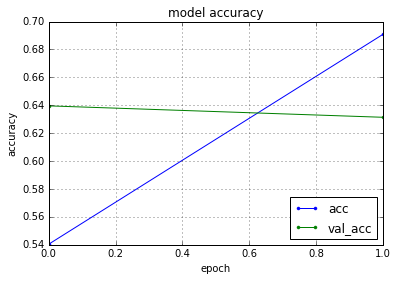

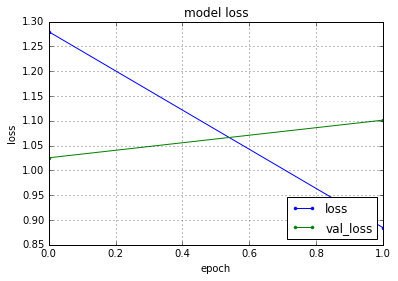

In [9]:
%matplotlib inline 
plot_history(history)